# Random Strategy

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def random_strategy(n):
  return random.randint(0, n-1), random.randint(0, n-1), random.choice(['horizontal', 'vertical'])

In [ ]:
def place_ships(n, shapes, num_trials):
    board = np.zeros((n, n), dtype=int)
    fig, axs = plt.subplots(num_trials, 1, figsize=(8, 8 * num_trials))
    fig.suptitle('Ship Placement Trials')
    for i in range(num_trials):
        trial_board = np.copy(board)
        for length in shapes:
            valid_placement = False
            k = 0
            while not valid_placement and k < 100:
                k += 1
                i_start, j_start, orientation = random_strategy(n)
                if orientation == 'horizontal':
                    # Check if the shape is within the board and the cells are empty

                    if j_start + length <= n and np.sum(trial_board[i_start, j_start:j_start+length]) == 0:
                        trial_board[i_start, j_start:j_start+length] = 1
                        valid_placement = True
                else:
                    if i_start + length <= n and np.sum(trial_board[i_start:i_start+length, j_start]) == 0:
                        trial_board[i_start:i_start+length, j_start] = 1
                        valid_placement = True
            if not valid_placement:
                break
        axs[i].imshow(trial_board, cmap='binary')
        axs[i].set_xticks(np.arange(0.5, n + 0.5, 1))
        axs[i].set_yticks(np.arange(0.5, n + 0.5, 1))
        axs[i].grid(color='grey', linestyle='-', linewidth=1)

In [ ]:
n = 10
ship_shapes = [2, 3, 4, 5]
num_trials = 10

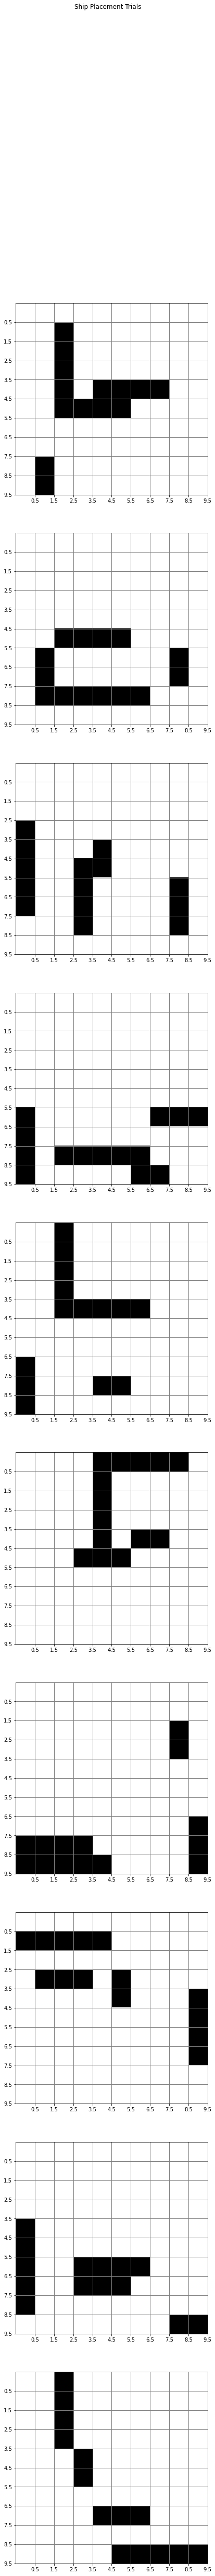

In [ ]:
place_ships(n, ship_shapes, num_trials)

# Soham

In [ ]:
import numpy as np
import random
from tqdm import tqdm
from matplotlib import pyplot as plt

In [ ]:
legend = {
    "Unexplored":0,
    "Hit":1,
    "Miss":2,
    "Sunk":3,
}


def place_ship(currentState, ships, hit_weight=2):
    boardR, boardC = currentState.shape
    countMap = np.zeros(currentState.shape)
    # Randomize Ship Lengths
    random.shuffle(ships)
    for shipLen in ships:
        valid_placement = False
        while not valid_placement:
            r_start, c_start = random.randint(0, boardR-1), random.randint(0, boardC-1)
            orientation = random.choice(['horizontal', 'vertical'])
            if orientation == 'horizontal':            
                # Check if within the board
                if c_start + shipLen <= boardC:
                    # Check if intersects with already placed Boat
                    if np.sum(countMap[r_start, c_start:c_start+shipLen])>0:
                        continue
                    # Check if intersects already sunk Cell
                    if np.any(np.isin(boardState[r_start, c_start:c_start+shipLen], legend["Sunk"])):
                        continue
                    # Check if intersects an MISS Cell
                    if np.any(np.isin(boardState[r_start, c_start:c_start+shipLen], legend["Miss"])):
                        continue
                    # Check if intersects an HIT Cell
                    if np.any(np.isin(boardState[r_start, c_start:c_start+shipLen], legend["Hit"])):
                        # Give higher weightage to randomly placed ships containing HIT Cells
                        countMap[r_start, c_start:c_start+shipLen] += hit_weight
                        valid_placement = True
                    # Otherwise
                    else:
                        countMap[r_start, c_start:c_start+shipLen] += 1
                        valid_placement = True
            else:
                # Check if within the board
                if r_start + shipLen <= boardR:
                    # Check if intersects with already placed Boat
                    if np.sum(countMap[r_start:r_start+shipLen, c_start])>0:
                        continue
                    # Check if intersects already sunk boat
                    if np.any(np.isin(boardState[r_start:r_start+shipLen, c_start], legend["Sunk"])):
                        continue
                    # Check if intersects an MISS Cell
                    if np.any(np.isin(boardState[r_start:r_start+shipLen, c_start], legend["Miss"])):
                        continue
                    # Check if intersects an HIT Cell
                    if np.any(np.isin(boardState[r_start:r_start+shipLen, c_start], legend["Hit"])):
                        # Give higher weightage to randomly placed ships containing HIT Cells
                        countMap[r_start:r_start+shipLen, c_start] += hit_weight
                        valid_placement = True
                    # Otherwise
                    else:
                        countMap[r_start:r_start+shipLen, c_start] += 1
                        valid_placement = True

    # Set Probabilities of already explored cells to be zero
    countMap[currentState!=0] = 0

                
    return countMap

In [ ]:
boardLen = 8
boardState = np.zeros((boardLen, boardLen))
ship_shapes = [2, 3, 4]
num_trials = 5000

In [ ]:
boardState[1,6] = legend["Sunk"]
boardState[1,7] = legend["Sunk"]
ship_shapes.remove(2)

boardState[0, 0] = legend["Hit"]

boardState[3,3] = legend["Miss"]
boardState[7,7] = legend["Miss"]

In [ ]:
boardState[1,6] = legend["Sunk"]
boardState[1,7] = legend["Sunk"]
ship_shapes.remove(2)

boardState[1, 1] = legend["Hit"]
# boardState[1, 2] = legend["Hit"]

boardState[3,3] = legend["Miss"]
boardState[7,7] = legend["Miss"]

In [ ]:
# Move 1
probMap = np.zeros((boardLen, boardLen))
for _ in tqdm(range(num_trials)):
    tempCounts = place_ship(boardState, ship_shapes, hit_weight=5)
    probMap+=tempCounts

probMap = probMap/num_trials

100%|██████████| 5000/5000 [00:01<00:00, 3004.64it/s]


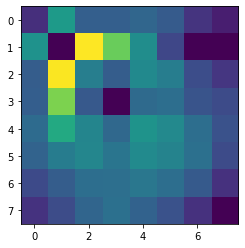

In [ ]:
plt.imshow(probMap)

In [ ]:
probMap

array([[0.0506, 0.2032, 0.1122, 0.1132, 0.1232, 0.1066, 0.0564, 0.0314],
       [0.19  , 0.    , 0.3722, 0.2874, 0.183 , 0.0788, 0.    , 0.    ],
       [0.1102, 0.3704, 0.1588, 0.1096, 0.1768, 0.1572, 0.0874, 0.0582],
       [0.1118, 0.2986, 0.1036, 0.    , 0.128 , 0.134 , 0.0968, 0.0854],
       [0.13  , 0.226 , 0.1696, 0.1258, 0.1912, 0.175 , 0.134 , 0.0944],
       [0.1182, 0.156 , 0.1704, 0.145 , 0.1786, 0.1662, 0.1378, 0.0856],
       [0.083 , 0.11  , 0.1346, 0.1358, 0.1474, 0.135 , 0.1056, 0.0534],
       [0.0542, 0.0858, 0.121 , 0.138 , 0.1172, 0.0932, 0.0534, 0.    ]])

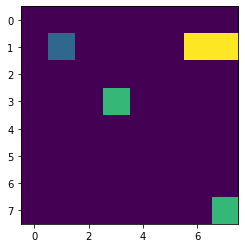

In [ ]:
plt.imshow(boardState)

# Soham + Heuristic

In [1]:
import numpy as np
import random
from tqdm import tqdm
from matplotlib import pyplot as plt
from collections import defaultdict

In [2]:
legend = {
    "Unexplored":0,
    "Hit":1,
    "Miss":2,
    "Sunk":3,
}

# def dfs(board, i, j, visited, countMap, hit_weight):
#     # Check if cell is a hit and not yet visited
#     if board[i][j] == legend["Hit"] and not visited[i][j]:
#         # Mark cell as visited
#         visited[i][j] = True
#         # Update probability of adjacent cells
#         for di, dj in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
#             ni, nj = i + di, j + dj
#             if ni >= 0 and ni < boardLen and nj >= 0 and nj < boardLen:
#                 if board[ni][nj] == legend["Unexplored"]:
#                     countMap[ni][nj] += hit_weight
#                 elif board[ni][nj] == legend["Hit"]:
#                     dfs(board, ni, nj, visited, countMap, hit_weight)


# '''
def dfs(board, i, j, visited, countMap, hit_weight):
    # Check if cell is a hit and not yet visited
    if board[i][j] == legend["Hit"] and not visited[i][j]:
        # Mark cell as visited
        visited[i][j] = True
        
        # Initialize hit counts
        row_hits = 0
        col_hits = 0
        
        # Update hit counts in the same row and column
        for k in range(len(board)):
            if board[i][k] == legend["Hit"]:
                row_hits += 1

            if board[k][j] == legend["Hit"]:
                col_hits += 1
        
        # Update probability of adjacent cells
        for di, dj in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            ni, nj = i, i + dj + dj
            if ni >= 0 and ni < len(board) and nj >= 0 and nj < len(board):
                if board[ni][nj] == legend["Unexplored"]:
                    # Increase weight if multiple hits in the same row or column
                    if row_hits > 1 and ni == i:
                        countMap[ni][nj] += hit_weight * (1 + row_hits)
                    elif col_hits > 1 and nj == j:
                        countMap[ni][nj] += hit_weight * (1 + col_hits)
                    
                    # Else give high weightage to cells around that one HIT Cell
                    else:
                        countMap[ni][nj] += 1
                elif board[ni][nj] == legend["Hit"]:
                    dfs(board, ni, nj, visited, countMap, hit_weight)
# '''


def place_ship_montecarlo(currentState, ships, hit_weight=2):
    boardLen = currentState.shape[0]
    countMap = np.zeros((boardLen, boardLen))
    visited = np.zeros((boardLen, boardLen), dtype=bool)

    maxIterPerShip = 10000

    # Randomize Ship Lengths
    random.shuffle(ships)
    for shipLen in ships:
        placementCount = 0
        valid_placement = False
        while not valid_placement:
            placementCount+=1
            if placementCount==maxIterPerShip:
                break
            r_start, c_start = random.randint(0, boardLen-1), random.randint(0, boardLen-1)
            orientation = random.choice(['horizontal', 'vertical'])
            if orientation == 'horizontal':
                # Check if within the board
                if c_start + shipLen <= boardLen:
                    # Check if intersects with already placed Boat
                    if np.sum(countMap[r_start, c_start:c_start+shipLen])>0:
                        continue
                    # Check if intersects already sunk Cell
                    if np.any(np.isin(currentState[r_start, c_start:c_start+shipLen], legend["Sunk"])):
                        continue
                    # Check if intersects an MISS Cell
                    if np.any(np.isin(currentState[r_start, c_start:c_start+shipLen], legend["Miss"])):
                        continue
                    # Check if intersects an HIT Cell
                    if np.any(np.isin(currentState[r_start, c_start:c_start+shipLen], legend["Hit"])):
                        hitCount = sum(currentState[r_start, c_start:c_start+shipLen]==legend["Hit"])
                        countMap[r_start, c_start:c_start+shipLen] += 1+hitCount

                        # Give higher weightage to randomly placed ships containing HIT Cells
                        # countMap[r_start, c_start:c_start+shipLen] += hit_weight
                        # Update probability of adjacent cells using DFS
                        # for c in range(c_start, c_start+shipLen):
                        #     dfs(currentState, r_start, c, visited, countMap, hit_weight)
                        valid_placement = True
                    # Otherwise
                    else:
                        
                        countMap[r_start, c_start:c_start+shipLen] += 1
                        valid_placement = True
            else:
                # Check if within the board
                if r_start + shipLen <= boardLen:
                    # Check if intersects with already placed Boat
                    if np.sum(countMap[r_start:r_start+shipLen, c_start])>0:
                        continue
                    # Check if intersects already sunk boat
                    if np.any(np.isin(currentState[r_start:r_start+shipLen, c_start], legend["Sunk"])):
                        continue
                   # Check if intersects an MISS Cell
                    if np.any(np.isin(currentState[r_start:r_start+shipLen, c_start], legend["Miss"])):
                        continue

                    # Check if intersects an HIT Cell
                    if np.any(np.isin(currentState[r_start:r_start+shipLen, c_start], legend["Hit"])):
                        hitCount = sum(currentState[r_start:r_start+shipLen, c_start]==legend["Hit"])
                        countMap[r_start:r_start+shipLen, c_start] += 1+hitCount

                        # Give higher weightage to randomly placed ships containing HIT Cells
                        # countMap[r_start:r_start+shipLen, c_start] += hit_weight
                        # Update probability of adjacent cells using DFS
                        # for r in range(r_start, r_start+shipLen):
                            # dfs(currentState, r, c_start, visited, countMap, hit_weight)
                        valid_placement = True
                    # Otherwise
                    else:
                        countMap[r_start, c_start:c_start+shipLen] += 1
                        valid_placement = True


    # Set Probabilities of already explored cells to be zero
    countMap[currentState!=0] = 0

    return countMap


"""
Generate num_trails monte carlo samples and return probability map
""" 
def get_probability_map(boardState, ship_shapes, num_trials, hit_weight=1):
    probMap = np.zeros(boardState.shape)
    for _ in range(num_trials):
        probMap += place_ship_montecarlo(boardState, ship_shapes, hit_weight)
    probMap = probMap/num_trials
    return probMap

In [3]:
# Generate Target Board
def check_valid_pc(x,y,ori,ship,board_state):
  """ori : Left, Down, Right, Up"""
  st = True
  if ori==0:
    st = st and x-ship >=0
  if ori==3:
    st = st and  y-ship >=0
  if ori==1:
    st = st and  y+ship < board_state.shape[0]
  if ori==2:
    st = st and  x+ship < board_state.shape[0]
  for i in range(ship):
    if ori==0:
      st = st and not board_state[x-i,y]
    if ori==3:
      st = st and not board_state[x,y-i]
    if ori==1:
      st = st and not board_state[x,y+i]
    if ori==2:
      st = st and not board_state[x+i,y]
  return st
def place_ship(x,y,ori,ind,ship,board_state,ship_list):
  for i in range(ship):
    if ori==0:
      board_state[x-i,y] = 1
      ship_list[(x-i,y)] = ind
    if ori==3:
      board_state[x,y-i] = 1
      ship_list[(x,y-i)] = ind
    if ori==1:
      board_state[x,y+i] = 1
      ship_list[(x,y+i)] = ind
    if ori==2:
      board_state[x+i,y] = 1
      ship_list[(x+i,y)] = ind
  return board_state, ship_list
def generate_board_pc(board_state, ships):
  ship_list = dict()
  ship_list[(-1,-1)] = ships
  for ind,ship in ships.items():
    ori = int(np.random.rand(1)*4)
    x,y = int(np.random.rand(1)*board_state.shape[0]),  int(np.random.rand(1)*board_state.shape[0])
    # x,y = 0,0
    while not check_valid_pc(x,y,ori,ship,board_state):
      x,y = int(np.random.rand(1)*board_state.shape[0]),  int(np.random.rand(1)*board_state.shape[0])
    board_state,ship_list = place_ship(x,y,ori,ind,ship,board_state,ship_list)
  return board_state,ship_list

In [4]:
boardLen = 10

ships = {0:2, 1:3, 2:4, 3:5}
def generate_game(board, ships={0:2, 1:3, 2:4, 3:5}):
    ship_shapes = list(ships.values())
    targetBoard = np.zeros_like(board)

    _, ship_dict = generate_board_pc(targetBoard, ships)

    # Create ship map
    shipsMap = defaultdict(lambda: [[], None])
    for k, v in ship_dict.items():
        if k==(-1,-1):
            continue
        shipsMap[v+1][0].append(k)
        shipsMap[v+1][1]=ships[v]
    shipsMap = dict(shipsMap)

    # Fill Target Board
    for ind_, cells in shipsMap.items():
        for x,y in cells[0]:
            targetBoard[x][y] = ind_

    return targetBoard, shipsMap

In [5]:
def getMovesToWin(targetBoard, targetShipsMap, shipLengthsDict={0:2, 1:3, 2:3, 3:4}, noMoves=100, noMonteCarloSamples=1000 ):
    ship_shapes = list(shipLengthsDict.values())
    boardState = np.zeros_like(targetBoard)

    shipsSunkSoFar = 0
    for i in range(1, noMoves):
        probMap = get_probability_map(boardState, ship_shapes, num_trials=noMonteCarloSamples, hit_weight=1)
        x,y = np.unravel_index(np.argmax(probMap), probMap.shape)
        # print(x,y)
        
        if targetBoard[x][y]!=0:
            # print(x,y,"HIT", i)
            shipIndex = targetBoard[x][y]
            targetShipsMap[shipIndex][1] -= 1
            hitsRemainingSoFar = targetShipsMap[shipIndex][1]
            if hitsRemainingSoFar == 0:
                # print("SINK")
                # Sunk
                size = 0
                for x_,y_ in targetShipsMap[shipIndex][0]:
                    size+=1
                    boardState[x_][y_] = legend["Sunk"]
                ship_shapes.remove(size)
                shipsSunkSoFar += 1
                if shipsSunkSoFar == len(shipLengthsDict):
                #     print("WIIIIIN", i)
                    return i
            else:
                boardState[x][y] = legend["Hit"]
        else:
            boardState[x][y] = legend["Miss"]
    return -1

In [15]:
# CDF Plots
def plot_cdf(resultsArr, title, saveas = None):
    xArr = np.arange(1,102)
    yArr = np.zeros_like(xArr)

    for i,x in enumerate(xArr):
        # print(i,x)
        yArr[i] = np.sum(resultsArr<x)
    
    plt.plot(xArr, yArr, label=title)
    plt.xlabel("No of Moves to Win")
    plt.ylabel("No of Games")
    plt.title("")
    plt.legend()
    if saveas:
        plt.savefig(saveas)

54


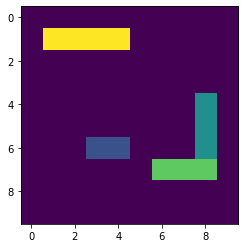

In [8]:
board = np.zeros((10,10))
shipLengthsDict={0:2, 1:3, 2:3, 3:4}
# For Emulating Opposite Player
targetBoard, targetShipsMap = generate_game(board, ships=shipLengthsDict)

plt.imshow(targetBoard)

movesToWin = getMovesToWin(targetBoard, targetShipsMap, shipLengthsDict, noMoves=150, noMonteCarloSamples=1000)
print(movesToWin)

In [ ]:
results = []

for game in range(50):
    board = np.zeros((10,10))
    shipLengthsDict={0:2, 1:3, 2:3, 3:4}
    # For Emulating Opposite Player
    targetBoard, targetShipsMap = generate_game(boardState, ships=shipLengthsDict)

    movesToWin = getMovesToWin(targetBoard, targetShipsMap, shipLengthsDict, noMoves=100, noMonteCarloSamples=200)
    print(movesToWin)
    results.append(movesToWin)

35
37
43
52
37
44
60
46
44
43
48
28
44
41
40
71
46
59
60
49
55
36
52
65
38
50
64
43
40
57
44
58
47
39
61
53
44
53
43
47
52
50
27
34
51
43
35
51
47
50


In [ ]:
resultsArr = np.array(results)
np.savetxt("MonteCarloResult.csv", resultsArr, delimiter=",")

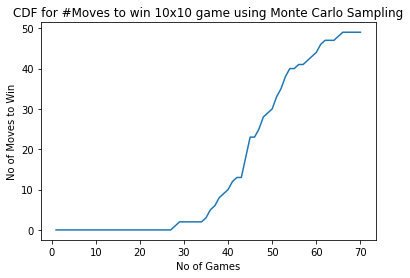

In [ ]:
title = "CDF for #Moves to win 10x10 game using Monte Carlo Sampling"
plot_cdf(resultsArr, title, "MonteCarloExp1")

In [16]:
MonteCarloResult = np.array([35, 37, 43, 52, 37, 44, 60, 46, 44, 43, 48, 28, 44, 41, 40, 71, 46,
       59, 60, 49, 55, 36, 52, 65, 38, 50, 64, 43, 40, 57, 44, 58, 47, 39,
       61, 53, 44, 53, 43, 47, 52, 50, 27, 34, 51, 43, 35, 51, 47, 50])

randomResult = np.array([ 92,  79,  84,  98,  88,  91,  99, 100,  93, 100,  95,  99,  97,
        91,  80,  97,  82,  93, 100,  99,  94,  92,  89,  87,  99,  80,
        93,  99,  89, 100,  69, 100,  98,  97,  97,  89, 100,  96,  91,
        87, 100,  95,  99,  82,  93,  72, 100,  97,  83,  91])

BFSResult = np.array([43, 65, 62, 51, 57, 44, 56, 79, 74, 53, 50, 88, 61, 68, 58, 63, 77,
       53, 59, 59, 57, 50, 61, 44, 74, 60, 31, 69, 79, 74, 64, 62, 62, 62,
       59, 72, 54, 41, 62, 73, 45, 42, 47, 51, 55, 66, 77, 80, 78, 68])

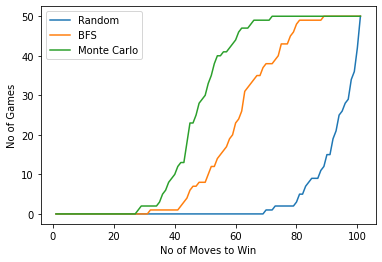

In [17]:
plot_cdf(randomResult, title="Random")
plot_cdf(BFSResult, title="BFS")
plot_cdf(MonteCarloResult, title="Monte Carlo", saveas="battleship-algo-eval.png")

In [19]:
np.savetxt("BFSResult.csv", BFSResult, delimiter=",")
np.savetxt("randomResult.csv", randomResult, delimiter=",")